src_h, src_w =  512 512
dst_h, dst_w =  700 700
bilinear interp


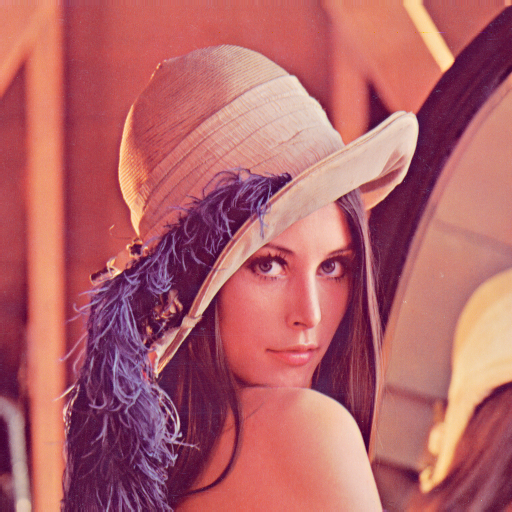

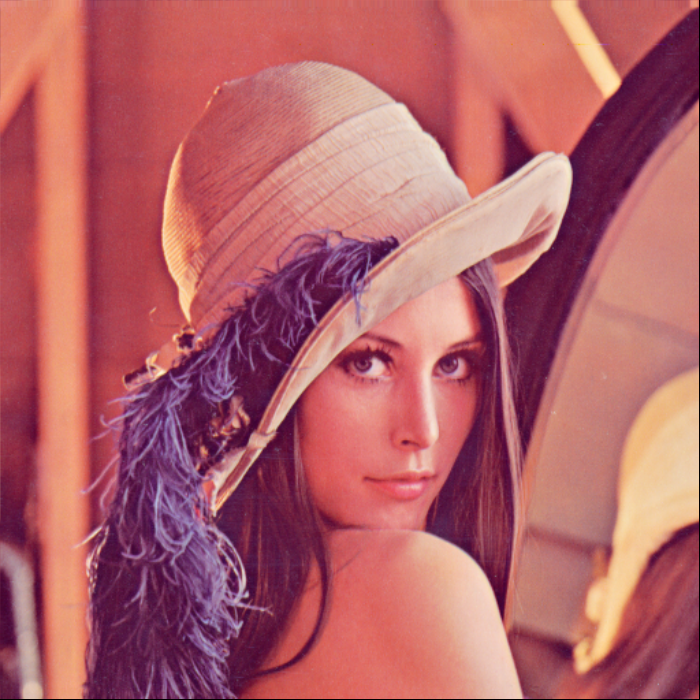

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

'''
python implementation of bilinear interpolation
'''
def bilinear_interpolation(img, out_dim):
  src_h, src_w, channel = img.shape
  dst_h, dst_w = out_dim[1], out_dim[0]
  print("src_h, src_w = ", src_h, src_w)
  print("dst_h, dst_w = ", dst_h, dst_w)
  if src_h == dst_h and src_w == dst_w:
    return img.copy()

  dst_img = np.zeros((dst_h, dst_w, 3), dtype = np.uint8)
  # 计算比例 x就是原图与目标图宽度的比例， y就是原图与目标图长短的比例
  scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h

  for i in range(channel):
    for dst_y in range(dst_h):
      for dst_x in range(dst_w):

        # find the origin x and y coordinates of dst image x and y
        # use geometric center symmetry
        # if use dirct way, src_x = dst_x * scale_x
        # 使几何中心对等， 0.5特别重要 为了使其更加平衡
        src_x = (dst_x + 0.5) * scale_x - 0.5
        src_y = (dst_y + 0.5) * scale_y - 0.5

        # find the coordinates of the points which will be used to compute the interpolation
        src_x0 = int(np.floor(src_x))
        src_x1 = min(src_x0 + 1, src_w - 1)
        src_y0 = int(np.floor(src_y))
        src_y1 = min(src_y0 + 1, src_h - 1)

        # calculate the interpolation
        temp0 = (src_x1 - src_x) * img[src_y0, src_x0, i] + (src_x - src_x0) * img[src_y0, src_x1, i]
        temp1 = (src_x1 - src_x) * img[src_y1, src_x0, i] + (src_x - src_x0) * img[src_y1, src_x1, i]
        dst_img[dst_y, dst_x, i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)


  return dst_img

if __name__ == '__main__':
  img = cv2.imread('lenna.png')
  dst = bilinear_interpolation(img, (700,700))
  print('bilinear interp')
  cv2_imshow(img)
  cv2_imshow(dst)
  cv2.waitKey()